<a href="https://colab.research.google.com/github/anakinguzman1224-coder/churn-prediction-pipeline/blob/main/Proyecto_telecom_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊**Proyecto Telecom X - Análisis de Predicción de Churn en Telecomunicaciones.**
Este proyecto busca en preprocesar, analizar y preparar un dataset de clientes para identificar patrones de abandono. Predecir la fuga (Churn).


## 1. Carga y Exploración de Datos.
Aquí importamos las librerías y realizamos el primer contacto con la tabla original.

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
#Hacemos la lectura del json
df = pd.read_json("https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json")
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [333]:
#normalizar el json, ya que tiene diccionarios anidados
df = pd.json_normalize(df.to_dict(orient='records'), sep='_')
df.columns
df


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


###1.1 Exploración.

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [335]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##2. Verificación de los Datos.

### 2.1 Verificar valores unicos y contenido del mismo.

In [336]:
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')
  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

customerID: 7267
Churn: 3
['No' 'Yes' '']
--------------------------------------------------
customer_gender: 2
['Female' 'Male']
--------------------------------------------------
customer_SeniorCitizen: 2
[0 1]
--------------------------------------------------
customer_Partner: 2
['Yes' 'No']
--------------------------------------------------
customer_Dependents: 2
['Yes' 'No']
--------------------------------------------------
customer_tenure: 73
phone_PhoneService: 2
['Yes' 'No']
--------------------------------------------------
phone_MultipleLines: 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
internet_InternetService: 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
internet_OnlineSecurity: 3
['No' 'Yes' 'No internet service']
--------------------------------------------------
internet_OnlineBackup: 3
['Yes' 'No' 'No internet service']
--------------------------------------------------
internet_DeviceProtecti

### 2.2 Valores nulos.

In [337]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


### 2.3 Verificar valores vacios, espacios o en blanco.

In [338]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()


,0
customerID,0
Churn,224
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


## 3. Transformaciones.

### 3.1 Evaluando la columna "account.Charges.Total".

In [339]:
df['account_Charges_Total'].dtype

dtype('O')

In [340]:
df['account_Charges_Total'].head()

,account_Charges_Total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4


In [341]:
type(df['account_Charges_Total'].iloc[0])

str

### 3.2 Convertir la columna "account_Charges_Total" a un tipo float.

In [342]:
df['account_Charges_Total'] = pd.to_numeric(
    df['account_Charges_Total'],
    errors='coerce'
)

In [343]:
type(df['account_Charges_Total'].iloc[0])

numpy.float64

### 3.3 Verificar datos nulos de la columna "account.Charges.Total".

In [344]:
df['account_Charges_Total'].isnull().sum()

np.int64(11)

In [345]:
df[df['account_Charges_Total'].isnull()]


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [346]:
df.loc[df['account_Charges_Total'].isnull(),
       ['customer_gender', 'account_Contract', 'account_Charges_Total']]


,customer_gender,account_Contract,account_Charges_Total
975,Female,Two year,NaN
1775,Female,Two year,NaN
1955,Male,Two year,NaN
2075,Male,One year,NaN
2232,Male,Two year,NaN
2308,Male,Two year,NaN
2930,Female,Two year,NaN
3134,Male,Two year,NaN
3203,Female,Two year,NaN
4169,Female,Two year,NaN


### 3.4 Eliminar filas con nulos en la columna específica.

In [347]:
df = df.dropna(subset=['account_Charges_Total'])


### 3.5 Verificar que ya no hay nulos.

In [348]:
df['account_Charges_Total'].isnull().sum()


np.int64(0)

### 3.6 Verificar la columna "Churn".

In [349]:
#Ver categorías existentes (su contenido)
df['Churn'].unique()


array(['No', 'Yes', ''], dtype=object)

In [350]:
# Contar cuántas categorías existen
df['Churn'].nunique()

3

In [351]:
# Ver distribución
print(df['Churn'].value_counts())

Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64


In [352]:
#📌 No borra valores, solo los limpia. Solo convierte valores inválidos en NaN, con replace.
#df['Churn'] = (df['Churn'].str.strip().replace('', pd.NA))
df.loc[:, 'Churn'] = df['Churn'].str.strip().replace('', pd.NA)


In [305]:
df['Churn'].unique()

array(['No', 'Yes', <NA>], dtype=object)

In [353]:
#La eliminación viene después
df = df.dropna(subset=['Churn'])

In [354]:
df = df.reset_index(drop=True)
# Verificamos que ya no existan
print(df['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64


## 4. Transformaciones de los datos de tipos Object y Category.



In [355]:
# Lista de columnas que identificamos como categorías
columnas_cat = ['customer_gender', 'account_Contract', 'account_PaymentMethod', 'Churn']

# Convertimos todas de un solo golpe
for col in columnas_cat:
    df[col] = df[col].astype('category')

# Verifica el cambio con info()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7032 non-null   object  
 1   Churn                      7032 non-null   category
 2   customer_gender            7032 non-null   category
 3   customer_SeniorCitizen     7032 non-null   int64   
 4   customer_Partner           7032 non-null   object  
 5   customer_Dependents        7032 non-null   object  
 6   customer_tenure            7032 non-null   int64   
 7   phone_PhoneService         7032 non-null   object  
 8   phone_MultipleLines        7032 non-null   object  
 9   internet_InternetService   7032 non-null   object  
 10  internet_OnlineSecurity    7032 non-null   object  
 11  internet_OnlineBackup      7032 non-null   object  
 12  internet_DeviceProtection  7032 non-null   object  
 13  internet_TechSupport       7032 n

In [356]:
# Definimos la lista de columnas de servicios
columnas_servicios = [
    'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]

# Aplicamos el cambio con el bucle
for col in columnas_servicios:
    df[col] = df[col].astype('category')

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7032 non-null   object  
 1   Churn                      7032 non-null   category
 2   customer_gender            7032 non-null   category
 3   customer_SeniorCitizen     7032 non-null   int64   
 4   customer_Partner           7032 non-null   object  
 5   customer_Dependents        7032 non-null   object  
 6   customer_tenure            7032 non-null   int64   
 7   phone_PhoneService         7032 non-null   category
 8   phone_MultipleLines        7032 non-null   category
 9   internet_InternetService   7032 non-null   category
 10  internet_OnlineSecurity    7032 non-null   category
 11  internet_OnlineBackup      7032 non-null   category
 12  internet_DeviceProtection  7032 non-null   category
 13  internet_TechSupport       7032 n

## 6. Carga y Analisis.

### 6.1 Análisis Descriptiva.

In [358]:
df.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### 6.2 Distribución de la Evasión.

In [359]:
fuga_cliente = df['Churn'].value_counts()
fuga_cliente

,count
Churn,
No,5163
Yes,1869


### 6.3 Visualizamos la Distribucion de Evasion clientes

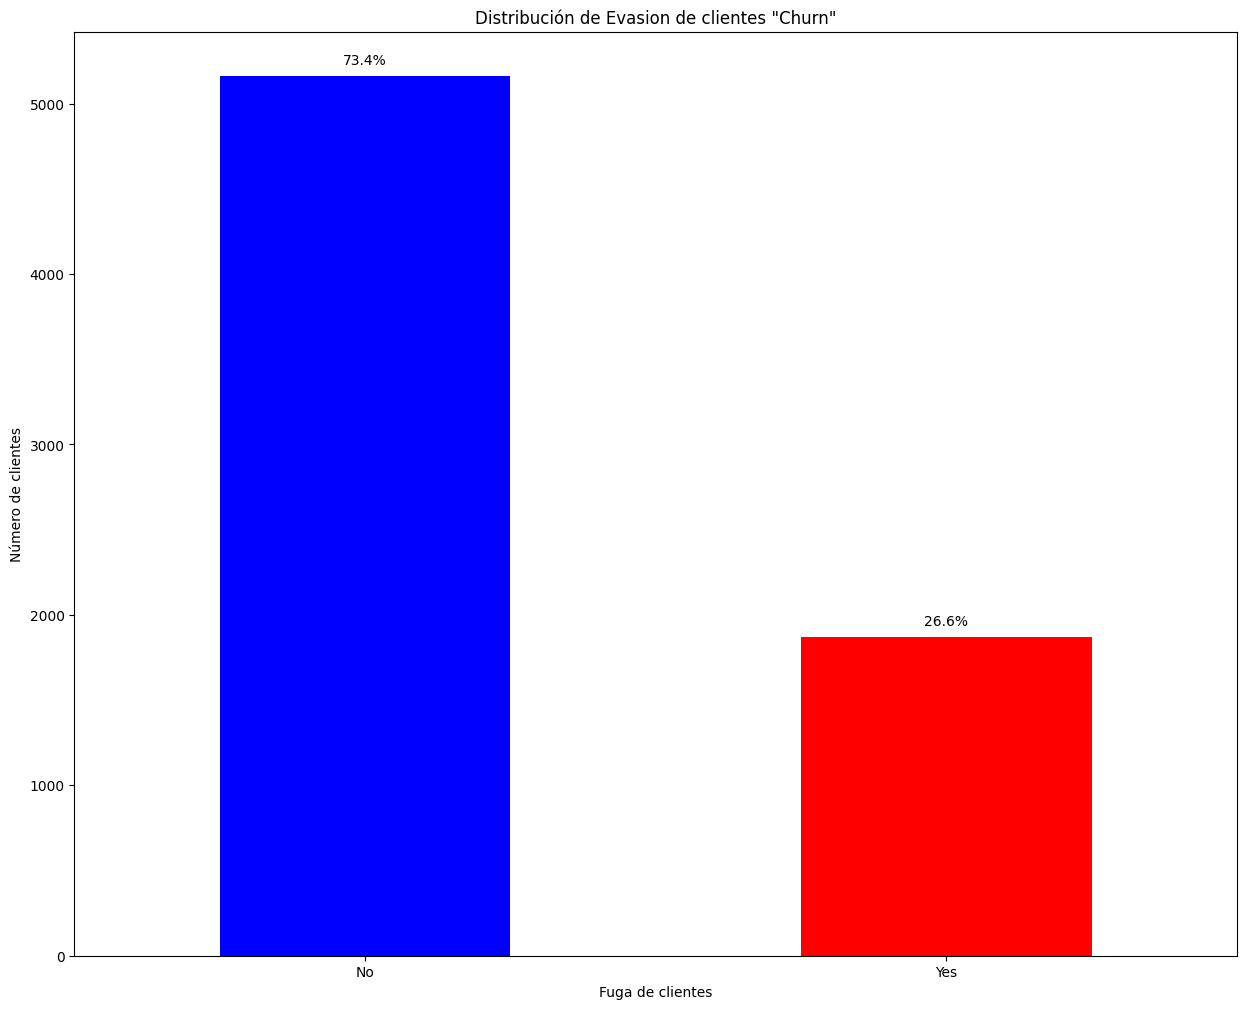

In [360]:
plt.figure(figsize=(15, 12))
fuga_cliente = df['Churn'].value_counts()
porcentaje = (fuga_cliente / len(df)) * 100

ax = fuga_cliente.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de Evasion de clientes "Churn"') #titulo
plt.xlabel('Fuga de clientes') #eje x
plt.ylabel('Número de clientes') # eje y
plt.xticks(rotation=0) # rotacion de 0 grados

for i, percentage in enumerate(porcentaje):
    ax.text(i, fuga_cliente.iloc[i] + 50, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show() # muestra el grafico


### 6.4 Agrupacion entre Tipo de Contrato y Evasión de Clientes

In [361]:
churn_contract = (
    df
    .groupby('account_Contract')['Churn']
    .value_counts()
    .unstack()
)
churn_contract

/tmp/ipython-input-3314849379.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('account_Contract')['Churn']


Churn,No,Yes
account_Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


### 6.5 Visualización Relación entre Tipo de Contrato y Evasión de Clientes

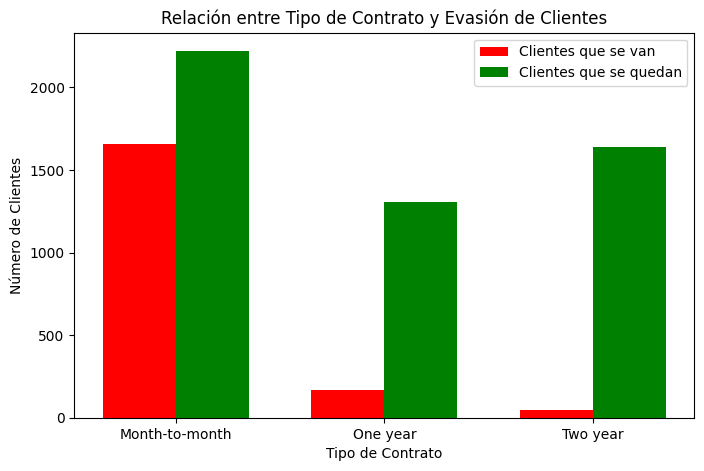

In [362]:
# Definimos colores para facilitar la lectura visual
color_churn = 'red'      # Rojo = clientes que SE VAN (Churn = Yes)
color_no_churn = 'green' # Verde = clientes que SE QUEDAN (Churn = No)

# Creamos las posiciones del eje X
# np.arange crea valores [0, 1, 2] según la cantidad de contratos
x = np.arange(len(churn_contract.index))

# Ancho de cada barra
width = 0.35

# Creamos la figura del gráfico y su tamaño
plt.figure(figsize=(8, 5))

# -------------------------
# BARRAS DE CLIENTES QUE SE VAN (CHURN = YES)
# Se colocan un poco a la IZQUIERDA
# -------------------------
plt.bar(
    x - width/2,                  # Posición en X (izquierda)
    churn_contract['Yes'],         # Altura de la barra (clientes que se van)
    width,                         # Ancho de la barra
    label='Clientes que se van',   # Texto de la leyenda
    color=color_churn              # Color rojo
)

# -------------------------
# BARRAS DE CLIENTES QUE SE QUEDAN (CHURN = NO)
# Se colocan un poco a la DERECHA
# -------------------------
plt.bar(
    x + width/2,                   # Posición en X (derecha)
    churn_contract['No'],           # Altura de la barra (clientes que se quedan)
    width,                         # Ancho de la barra
    label='Clientes que se quedan',# Texto de la leyenda
    color=color_no_churn            # Color verde
)

# Etiquetas del gráfico
plt.title('Relación entre Tipo de Contrato y Evasión de Clientes') # Título del gráfico
plt.xlabel('Tipo de Contrato')          # Eje X
plt.ylabel('Número de Clientes')        # Eje Y

# Cambiamos los valores 0,1,2 por los nombres reales de los contratos
plt.xticks(x, churn_contract.index)

# Mostramos la leyenda
plt.legend()

# Mostramos el gráfico
plt.show()



### 6.6 Agrupamos por tipo de servicio

In [363]:
churn_internet = (
    df
    .groupby('internet_InternetService')['Churn']
    .value_counts()
    .unstack()
)
churn_internet


/tmp/ipython-input-2941268644.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('internet_InternetService')['Churn']


Churn,No,Yes
internet_InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


### 6.7 Visualización de Evasión por Tipo de Servicio de Internet

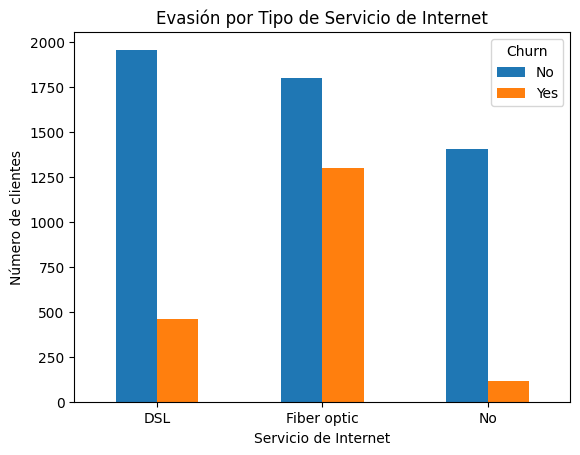

In [364]:
churn_internet.plot(kind='bar')
plt.title('Evasión por Tipo de Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Número de clientes')
plt.legend(title='Churn')
plt.xticks(rotation = 0)
plt.show()


## 7. Ingeniería de Variables (Feature Engineering)

In [365]:
# 1. Primero aseguramos que no existan espacios raros (por si acaso)
df['Churn'] = df['Churn'].astype(str).str.strip()



### 7.1 Codificación de variables binarias
Convertimos Yes/No a 1/0

In [366]:
# 2. Aplicamos el mapa directamente a la serie
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [367]:
# 3. Convertimos a entero para que sea numérico puro
df['Churn'] = df['Churn'].astype(int)

In [368]:
# Verificamos el resultado
print(df['Churn'].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


In [369]:
df['Churn'].unique()

array([0, 1])

In [370]:
#Aplanamos el terreno (Reseteo de índice)
# drop=True para no crear una columna extra de basura
# inplace=True para que el cambio se guarde en el df original
df.reset_index(drop=True, inplace=True)

In [371]:
#Pasamos el "radar" para encontrar las columnas binarias
# Buscamos solo las que tienen Yes, No o nulos
columnas_binarias= [col for col in df.columns if set(df[col].unique()).issubset({'Yes', 'No', 'nan', None})]

#Verificamos qué encontró el radar
print("Columnas binarias encontradas:", columnas_binarias)

Columnas binarias encontradas: ['customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']


In [372]:
#Aplicamos el reemplazo a toda la selección de columnas
df[columnas_binarias] = df[columnas_binarias].replace({'Yes': 1, 'No': 0})
df[columnas_binarias] = df[columnas_binarias].astype(int)

/tmp/ipython-input-364897697.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_binarias] = df[columnas_binarias].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-364897697.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[columnas_binarias] = df[columnas_binarias].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-364897697.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futur

In [373]:
#Verificamos que ya no haya texto, solo 0 y 1
print(df[columnas_binarias].dtypes)
print(df[columnas_binarias].head())

customer_Partner            int64
customer_Dependents         int64
phone_PhoneService          int64
account_PaperlessBilling    int64
dtype: object
   customer_Partner  customer_Dependents  phone_PhoneService  \
0                 1                    1                   1   
1                 0                    0                   1   
2                 0                    0                   1   
3                 1                    0                   1   
4                 1                    0                   1   

   account_PaperlessBilling  
0                         1  
1                         0  
2                         1  
3                         1  
4                         1  


### 7.2 Codificación One-Hot-Encoding para variables multiclase
Transformamos categorías nominales usando `pd.get_dummies`.

In [374]:
# Ahora vemos las columnas con más de dos categorías
# 1. Creamos una lista vacía para guardar los nombres
columnas_multiclase = []

# 2. Empezamos el bucle: "Por cada columna en mi tabla"
for col in df.columns:

    # 3. ¿Es una columna de texto (object)?
    if df[col].dtype == 'object' or df[col].dtype == 'category':

        # 4. ¿Tiene más de 2 respuestas distintas?
        if df[col].nunique() > 2:

            # 5. Si cumple ambas condiciones, la anotamos en nuestra lista
            columnas_multiclase.append(col)

            # Imprimimos para ver qué encontró
            print(f"Encontré : '{col}' con {df[col].nunique()} opciones: {df[col].unique()}")

print("\n-------------------------")
print(f"Lista final para procesar: {columnas_multiclase}")

Encontré : 'customerID' con 7032 opciones: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Encontré : 'phone_MultipleLines' con 3 opciones: ['No', 'Yes', 'No phone service']
Categories (3, object): ['No', 'No phone service', 'Yes']
Encontré : 'internet_InternetService' con 3 opciones: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
Encontré : 'internet_OnlineSecurity' con 3 opciones: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Encontré : 'internet_OnlineBackup' con 3 opciones: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Encontré : 'internet_DeviceProtection' con 3 opciones: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Encontré : 'internet_TechSupport' con 3 opciones: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', '

### 7.3 Limpieza de Lista y Dummies

In [375]:
# Sacamos 'customerID' porque no sirve para el modelo
if 'customerID' in columnas_multiclase:
    columnas_multiclase.remove('customerID')

print(f"Lista limpia para Dummies: {columnas_multiclase}")

Lista limpia para Dummies: ['phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaymentMethod']


Crear los Dummies (One-Hot Encoding)
Aquí usaremos pd.get_dummies. Este comando va a agarrar esas columnas y las va a "explotar" en columnas de 0 y 1.

In [376]:
# Creamos el nuevo DataFrame con las columnas transformadas
# drop_first=True para no tener columnas redundantes
df_final = pd.get_dummies(df, columns=columnas_multiclase, drop_first=True)

# Imprimimos la tabla
print(f"Forma de la tabla antes: {df.shape}")
print(f"Forma de la tabla ahora: {df_final.shape}")

Forma de la tabla antes: (7032, 21)
Forma de la tabla ahora: (7032, 32)


In [377]:
df_final.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'account_PaperlessBilling',
       'account_Charges_Monthly', 'account_Charges_Total',
       'phone_MultipleLines_No phone service', 'phone_MultipleLines_Yes',
       'internet_InternetService_Fiber optic', 'internet_InternetService_No',
       'internet_OnlineSecurity_No internet service',
       'internet_OnlineSecurity_Yes',
       'internet_OnlineBackup_No internet service',
       'internet_OnlineBackup_Yes',
       'internet_DeviceProtection_No internet service',
       'internet_DeviceProtection_Yes',
       'internet_TechSupport_No internet service', 'internet_TechSupport_Yes',
       'internet_StreamingTV_No internet service', 'internet_StreamingTV_Yes',
       'internet_StreamingMovies_No internet service',
       'internet_StreamingMovies_Yes', 'account_Contract_One year',
       'account_Contract_Two ye

## 8. Preparación Final para Modelado
En este paso final, separamos los datos en dos partes:

Variable Objetivo/dependiente (y): La columna Churn (lo que queremos predecir).

Variables Predictoras/independiente/explicativas (X): Todas las demás columnas que aportan información, eliminando el customerID ya que es un identificador único que no aporta valor predictivo.

In [379]:
# 1. Definimos la variable objetivo
y = df_final['Churn']

# 2. Definimos las variables predictoras (X)
# Quitamos 'Churn' (porque es el objetivo) y 'customerID' (porque no es una característica)
# X = df_final.drop(columns=['Churn', 'customerID']) Es lo mismo que axis=1
X = df_final.drop(['Churn', 'customerID'], axis=1)

print(f"Tamaño de X (Predictores): {X.shape}")
print(f"Tamaño de y (Objetivo): {y.shape}")

# Muestra las primeras filas de X para confirmar que no está Churn ni customerID
X.head()

Tamaño de X (Predictores): (7032, 30)
Tamaño de y (Objetivo): (7032,)


,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,phone_MultipleLines_No phone service,...,internet_TechSupport_Yes,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,Female,0,1,1,9,1,1,65.6,593.30,False,...,True,False,True,False,False,True,False,False,False,True
1,Male,0,0,0,9,1,0,59.9,542.40,False,...,False,False,False,False,True,False,False,False,False,True
2,Male,0,0,0,4,1,1,73.9,280.85,False,...,False,False,False,False,False,False,False,False,True,False
3,Male,1,1,0,13,1,1,98.0,1237.85,False,...,False,False,True,False,True,False,False,False,True,False
4,Female,1,1,0,3,1,1,83.9,267.40,False,...,True,False,True,False,False,False,False,False,False,True
